In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [4]:
store = pd.read_csv('Superstore.csv')

In [4]:
store.head(10)

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2
5,Storage & Organization,Hot Springs,Small Box,1697,Holly Osborne,Home Office,Office Supplies,0.00,10896,"Fellowes Personal Hanging Folder Files, Navy",...,0.57,-254,South,4/13/1968,130,9/4/2017,Regular Air,6,Arkansas,13
6,Tables,Woodmere,Jumbo Box,1603,Dwight Pentecost,Small Business,Furniture,0.05,10550,"Bevis Round Conference Table Top, X-Base",...,0.76,-537,East,6/6/1964,187,1/13/2018,Delivery Truck,29,New York,179
7,Office Furnishings,Laurel,Medium Box,2924,Courtney Nelson,Consumer,Furniture,0.02,10535,"Rubbermaid ClusterMat Chairmats, Mat Size- 66""...",...,0.69,-106,East,3/23/1950,227,10/20/2017,Regular Air,14,Maryland,111
8,Paper,Laurel,Wrap Bag,2924,Courtney Nelson,Consumer,Office Supplies,0.01,11122,"TOPS Money Receipt Book, Consecutively Numbere...",...,0.40,45,East,3/24/1950,69,10/18/2018,Regular Air,3,Maryland,8
9,Rubber Bands,Woodmere,Wrap Bag,1603,Dwight Pentecost,Small Business,Office Supplies,0.09,10573,Stockwell Push Pins,...,0.52,2,East,6/5/1964,19,1/13/2018,Regular Air,1,New York,2


In [5]:
# QUESTION 2. Use the Superstore data. Create a dataframe that sorts average sales by state in descending order. 
# What's the highest average sales in a state? Round to nearest whole number.

In [6]:
store2 = store.groupby(['State'])['Sales'].mean()
store2 = store2.reset_index().sort_values(by = 'Sales', ascending = False)
store2.head()

,State,Sales
7,District of Columbia,3218.661765
45,Washington,1577.386243
19,Massachusetts,1242.159453
3,California,1221.864662
39,South Dakota,1192.035714


In [7]:
# 3. Use the Superstore data. Create a dataframe that sorts total profit by category in descending order. 
# What's the highest total profit for a category? Round to nearest whole number.

In [8]:
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [9]:
store3 = store.groupby(['Category'])['Profit'].sum()
store3 = store3.reset_index().sort_values(by='Profit', ascending = False)
store3 =  store3.rename(columns={'Profit':'Total Profit'})
store3

,Category,Total Profit
16,Telephones and Communication,297944
1,Binders and Binder Accessories,226582
9,Office Machines,168079
3,Chairs & Chairmats,165341
5,Copiers and Fax,129154
0,Appliances,121641
8,Office Furnishings,92216
4,Computer Peripherals,87911
6,Envelopes,46133
10,Paper,35360


In [10]:
# 4. Use the Superstore data. Create a dataframe that sorts total sales by category and region in descending order. 
# What's the highest total sales for a combination of category and region? Round to nearest whole number.

In [67]:
store4 = store.groupby(['Category','Region'])['Sales'].sum()
store4 = store4.reset_index()
store4 = store4.sort_values(by='Sales', ascending = False)
store4 = store4.rename(columns = {'Sales':'Total Sales'})
store4

,Category,Region,Total Sales
13,Chairs & Chairmats,East,478931
61,Tables,East,410619
65,Telephones and Communication,East,402051
64,Telephones and Communication,Central,359778
39,Office Machines,West,347529
...,...,...,...
49,Rubber Bands,East,3543
31,Labels,West,3473
48,Rubber Bands,Central,2520
51,Rubber Bands,West,1541


In [69]:
# 5. Use the Superstore data. Create a dataframe that sorts total sales by postal code in descending order.
# How many postal codes have total sales over $100,000?

In [70]:
store.columns #'Postal Code'

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [76]:
store5 = store.groupby('Postal Code')['Sales'].sum()
store5 = store5.reset_index().sort_values(by = 'Sales', ascending = False)
store5 = store5[store5['Sales']>100000]
store5

,Postal Code,Sales
25,1540,579495
1133,75061,376895
90,2129,309879
349,10956,156604
1342,90061,123748
219,6488,115300
1369,92236,105650
1474,98119,103508


In [77]:
# 6. Use the Superstore data. Create a dataframe that shows the maximum transaction value (sales) for each category. 
# What's the maximum transaction value (sales) for the envelopes category? 

In [13]:
store6 = store.groupby('Category')['Sales'].max().reset_index()
store6 = store6[store6['Category']=='Envelopes']
store6

,Category,Sales
6,Envelopes,23161


In [14]:
# 7. Use the Superstore data. Create a dataframe that shows total order quantity by item ID in the central region. 
# What's the item ID with the most order quantity in the central region? 

In [24]:
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [31]:
store_central = store[store['Region'] == 'Central']
store7 = store_central.groupby('Item ID')['Order Quantity'].sum().reset_index()
store7.sort_values(by = 'Order Quantity', ascending = False)

,Item ID,Order Quantity
774,10962,276
457,10607,253
990,11197,193
647,10814,193
889,11090,192
...,...,...
205,10301,1
146,10219,1
806,10996,1
446,10594,1


In [15]:
# 8. Use the Superstore data. Create a new variable 'Profit_Margin' that is profit divided by sales.
# Create a dataframe that sorts average profit margin by item ID in ascending order. 
# What's the item ID of the product with lowest average profit margin?


In [37]:
store['Profit Margin'] = store['Profit'] / store['Sales']
store8 = store.groupby('Item ID')['Profit Margin'].mean().reset_index()
store8 = store8.sort_values( by ='Profit Margin')
store8

,Item ID,Profit Margin
1054,11055,-131.743966
911,10912,-102.055358
478,10479,-41.222426
176,10177,-30.163899
904,10905,-29.332997
...,...,...
108,10109,14.252404
457,10458,16.624759
304,10305,36.403371
437,10438,60.257884


In [16]:
# 9. Use the Superstore data. Create a dataframe that sorts total sales by customer ID in descending order.
# What's the customer ID of the customer whose total sales is ranked 100th highest? 
# One way to use 'iloc' to find the value at a particular index. 
# The other way is to use the rank function with method = 'min', ascending = False.
# (see here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html).

In [49]:
store9 = store.groupby('Customer ID')['Sales'].sum().reset_index()
store9_sort = store9.sort_values(by = 'Sales', ascending = False)
store9_top100 = store9_sort.iloc[99:]['Customer ID']
store9_top100
# 1734

1392    1734
258      324
545      679
2373    2977
984     1217
        ... 
1448    1803
339      422
1935    2425
1150    1414
139      171
Name: Customer ID, Length: 2604, dtype: int64

In [51]:
# using Rank method = min
store9['Rank'] = store9['Sales'].rank(method = 'min', ascending = False)
store_top100 = store9[store9['Rank'] == 100]['Customer ID'].values[0]
store_top100


1734

In [17]:
# 10. Use the Superstore data. Create 2 new variables (Year and Month) using order date. 
# Which combination of year and month has the highest total sales? 
# Enter the answer as YYYYMM (e.g. If your answer is January 2021, enter 202101).

In [52]:
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Profit Margin'],
      dtype='object')

In [63]:

# Convert the 'Order Date' column to a datetime object
store['Order Date'] = pd.to_datetime(store['Order Date'])

# Extract the 'Year' and 'Month' from the 'Order Date' and create new columns
store['Year'] = store['Order Date'].dt.year
store['Month'] = store['Order Date'].dt.month
store.columns
store[['Order Date', 'Month', 'Year', 'Order ID']]

# Group df by month and year and sum the sales
store_date = store.groupby(['Month','Year'])['Sales'].sum().reset_index()
store_date

# Highest combination
store_date = store_date.sort_values(by = 'Sales', ascending = False)
store_date.head(1)

,Month,Year,Sales
3,1,2017,962382


In [18]:
# 11. Use the Superstore data. 
# Create 3 dataframes that show the states by total sales, total profit, and total order quantity respectively. 
# Join the 3 dataframes using join (e.g. df4 = df1.join(df2).join(df3)).
# What's the value at index [25, 2]?


In [78]:
df1 = store.groupby('State')['Sales'].sum().reset_index()
df2 = store.groupby('State')['Profit'].sum().reset_index()
df3=  store.groupby('State')['Order Quantity'].sum().reset_index()

# Join the three dataframes using .join()
df4 = df1.set_index('State').join(df2.set_index('State')).join(df3.set_index('State'))

value = df4.iloc[25, 2]
df4

,Sales,Profit,Order Quantity
State,,,
Alabama,126716,10779,1416
Arizona,95031,30211,1284
Arkansas,94533,7453,1213
California,975048,80333,12576
Colorado,95359,19693,1269
Connecticut,229756,64073,3759
Delaware,3543,62,115
District of Columbia,218869,25513,2358
Florida,427410,26417,5163


In [76]:
df1 = store.groupby('State')['Sales'].sum().reset_index()
df2 = store.groupby('State')['Profit'].sum().reset_index()
df3 =  store.groupby('State')['Order Quantity'].sum().reset_index()

merged = df1.set_index('State').join(df2.set_index('State'), on='State', how='left')
merged = merged.join(df3.set_index('State'), on='State', how='left')

value = merged.iloc[25, 2]
value

697

In [82]:
df1.head(2)

,State,Sales
0,Alabama,126716
1,Arizona,95031


In [84]:
df4.columns

Index(['Sales', 'Profit', 'Order Quantity'], dtype='object')

In [77]:
total_order_qty.head()

,State,Order Quantity
0,Alabama,1416
1,Arizona,1284
2,Arkansas,1213
3,California,12576
4,Colorado,1269


In [80]:
# 12. Use the dataframe created in Q11. Use sklearn. 
# Use k-means to cluster the states by total sales, total profit, and total order quantity.
# Use n_clusters=3, random_state=100, max_iter=100.
# How many states belong to the largest cluster? 

kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100) 

In [91]:
X = df4[['Sales', 'Profit', 'Order Quantity']]
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)
kmeans.fit(X)
df4['Cluster'] = kmeans.labels_
cluster_counts = df4['Cluster'].value_counts()
cluster_counts

# Find the largest cluster
largest_cluster = cluster_counts.idxmax()

# Find the number of states in the largest cluster
states_in_largest_cluster = cluster_counts.loc[largest_cluster]
states_in_largest_cluster

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


35

In [95]:
df4.shape

(49, 4)

In [94]:
X = df4[['Sales', 'Profit', 'Order Quantity']]
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)
kmeans.fit(X)
df4['Cluster'] = kmeans.labels_
cluster_counts = df4['Cluster'].value_counts()
cluster_counts


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    35
0    11
1     3
Name: Cluster, dtype: int64

In [107]:
# 13. Use the dataframe created in Q11. Use sklearn. 
# Use k-means to cluster the states by total sales, total profit, and total order quantity.
# Use n_clusters=3, random_state=100, max_iter=100.
# What's the mean profit for the cluster with most states? Round to nearest whole number.

df5 = df4.copy()
X2 = df5[['Sales', 'Profit', 'Order Quantity']]

# Initialize the KMeans model with n_clusters=3 and other parameters
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)

# Fit the model to the data
kmeans.fit(X2)

# Add the cluster labels to the original dataframe
df5['Cluster'] = kmeans.labels_

# Count the number of states in each cluster
cluster_counts = df5['Cluster'].value_counts()

# Find the largest cluster
largest_cluster = cluster_counts.idxmax()
largest_cluster

# Filter the dataframe to include only the largest cluster
q13 = df5[df5['Cluster']==largest_cluster]
q13 = q13['Profit'].mean()
q13


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


14211.228571428572

In [21]:
# 14. Use the dataframe created in Q11. Use sklearn. 
# Use k-means to cluster the states by total sales, total profit, and total order quantity.
# Use n_clusters=3, random_state=100, max_iter=100.
# Which states belong to the same cluster as Alabama? Choose all that apply. 


In [108]:

df5 = df4.copy()
X2 = df5[['Sales', 'Profit', 'Order Quantity']]

# Initialize the KMeans model with n_clusters=3 and other parameters
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)

# Fit the model to the data
kmeans.fit(X2)

# Add the cluster labels to the original dataframe
df5['Cluster'] = kmeans.labels_
df5

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sales,Profit,Order Quantity,Cluster
State,,,,
Alabama,126716,10779,1416,2
Arizona,95031,30211,1284,2
Arkansas,94533,7453,1213,2
California,975048,80333,12576,1
Colorado,95359,19693,1269,2
Connecticut,229756,64073,3759,0
Delaware,3543,62,115,2
District of Columbia,218869,25513,2358,0
Florida,427410,26417,5163,0


In [22]:
# 15. Use the dataframe created in Q11. Use sklearn. 
# Use k-means to cluster the states by total sales, total profit, and total order quantity.
# Use random_state=100, max_iter=100.
# Run the elbow method to choose the optimal number of clusters. How many clusters would you choose? 


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Within-Cluster Sum of Errors')

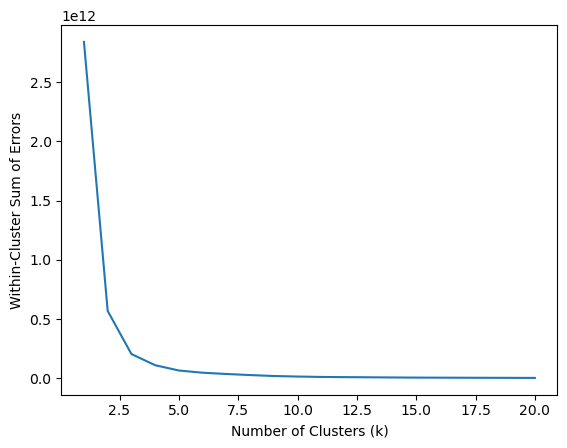

In [114]:
df5 = df4.copy()
X2 = df5[['Sales', 'Profit', 'Order Quantity']]

# Initialize the KMeans model with n_clusters=3 and other parameters
kmeans = KMeans(random_state=100, max_iter=100)

max_K = 20

k = np.arange(1, max_K+1) 
errors = []

for i in range(1,max_K+1):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(X2)
    errors.append(kmeans.inertia_)
    
results = pd.DataFrame({'k': k, 'errors': errors})

plt.plot('k', 'errors', data=results)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Errors')

In [23]:
# 16. Use the dataframe created in Q11. Use sklearn. 
# Use GMM (Gaussian Mixture Models) to cluster the states by total sales, total profit, and total order quantity.
# Use n_components=5, random_state=100, max_iter=100.
# How many states belong to largest cluster? 



In [121]:
X3 = df5[['Sales', 'Profit', 'Order Quantity']]
gmm = GaussianMixture(n_components = 5, random_state = 100, max_iter = 100)
gmm.fit(X3)

clusters = pd.DataFrame(X3)

# Predict the cluster labels for the data
cluster_labels = gmm.predict(X3)
df5['Cluster'] = cluster_labels

cluster_counts = df5['Cluster'].value_counts()
cluster_counts
# Find the largest cluster
largest_cluster = cluster_counts.idxmax()
largest_cluster
cluster_counts

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3    18
1    18
4     8
2     3
0     2
Name: Cluster, dtype: int64

In [5]:
store.head()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2


In [8]:
store_maxsales = store.groupby('State')['Sales'].max().reset_index()

store_maxsales

,State,Sales
0,Alabama,20553
1,Arizona,11767
2,Arkansas,25030
3,California,100119
4,Colorado,9799
5,Connecticut,18123
6,Delaware,1076
7,District of Columbia,45737
8,Florida,40137
9,Georgia,23066


In [11]:
# Use the Superstore data (you may need to re-read it into Pandas so it has columns to begin with)
# create a dataframe that shows tha max values (sales) of a transaction in each state
# Rename this column Max_state_sales.
# merge this dataframe with the original dataframe using state as the key, so a new column Max_state_sales
# showing max sales for the state in each row is added.
# (i.e., the original dataframe is not changed, but simply has an extra columns added on the right)
# what's the value at index [500,26]?


max_state_sales= store.groupby("State")["Sales"].max().reset_index()


max_state_sales.rename(columns={"Sales": "Max_state_sales"}, inplace=True)


merged_df = store.merge(max_state_sales, on="State", how="left")


value_at_index_500_26 = merged_df.at[500, "Max_state_sales"]
value_at_index_500_26

19568

In [12]:
max_state_sales= store.groupby("State")["Sales"].max().reset_index()
max_state_sales.rename(columns={"Sales": "Max_state_sales"}, inplace=True)
value_at_index_500_26 = merged_df.iloc[500, 26]
value_at_index_500_26

19568